<a href="https://colab.research.google.com/github/Aman151295/Logistic-Regression-Problem/blob/main/Logistic_problem_statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as smf

# **Loading datset**

In [47]:
Bank_Data = pd.read_csv('/content/bank-full.csv')
print(Bank_Data)


       Age           Job   Marital  education  ... pdays  previous poutcome    y
0       58    management   married   tertiary  ...    -1         0  unknown   no
1       44    technician    single  secondary  ...    -1         0  unknown   no
2       33  entrepreneur   married  secondary  ...    -1         0  unknown   no
3       47   blue-collar   married    unknown  ...    -1         0  unknown   no
4       33       unknown    single    unknown  ...    -1         0  unknown   no
...    ...           ...       ...        ...  ...   ...       ...      ...  ...
45206   51    technician   married   tertiary  ...    -1         0  unknown  yes
45207   71       retired  divorced    primary  ...    -1         0  unknown  yes
45208   72       retired   married  secondary  ...   184         3  success  yes
45209   57   blue-collar   married  secondary  ...    -1         0  unknown   no
45210   37  entrepreneur   married  secondary  ...   188        11    other   no

[45211 rows x 17 columns]


In [48]:
Bank_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        45211 non-null  int64 
 1   Job        45211 non-null  object
 2   Marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **Conversion of Data types**

In [49]:
#Convertion of Data Types

Bank_Data['Job'] = Bank_Data['Job'].astype('category')
Bank_Data['Marital'] = Bank_Data['Marital'].astype('category')
Bank_Data['education'] = Bank_Data['education'].astype('category')
Bank_Data['education'] = Bank_Data['education'].astype('category')
Bank_Data['poutcome'] = Bank_Data['poutcome'].astype('category')
Bank_Data['month'] = Bank_Data['month'].astype('category')
Bank_Data['contact'] = Bank_Data['contact'].astype('category')


print(Bank_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Age        45211 non-null  int64   
 1   Job        45211 non-null  category
 2   Marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  object  
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  object  
 7   loan       45211 non-null  object  
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  object  
dtypes: category(6), int64(7), object(4)
memory usage: 4.1+ MB
None


In [50]:
# Null detection in datframe
Bank_Data.isnull().sum()

Age          0
Job          0
Marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [51]:
#Way to find Duplicate rows from Dataframe

Dup_rows = Bank_Data[Bank_Data.duplicated() == True]
print(Dup_rows)

#2nd Way to find the duplicate row

Bank_Data[Bank_Data.duplicated()]

Empty DataFrame
Columns: [Age, Job, Marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []


,Age,Job,Marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


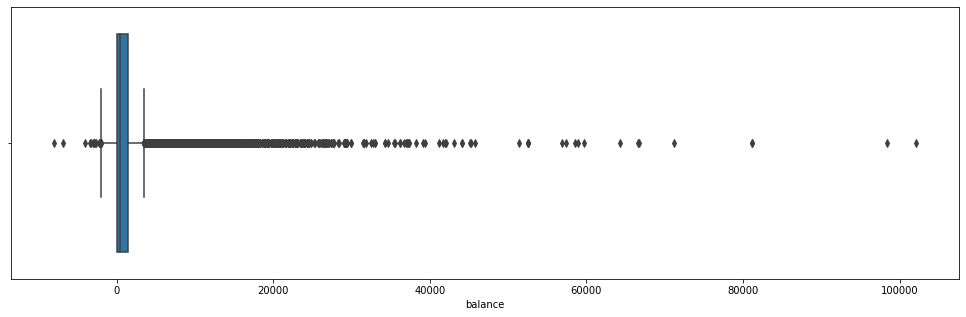

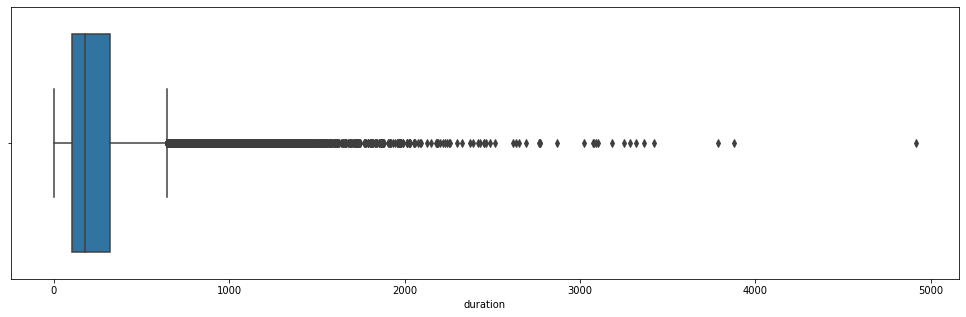

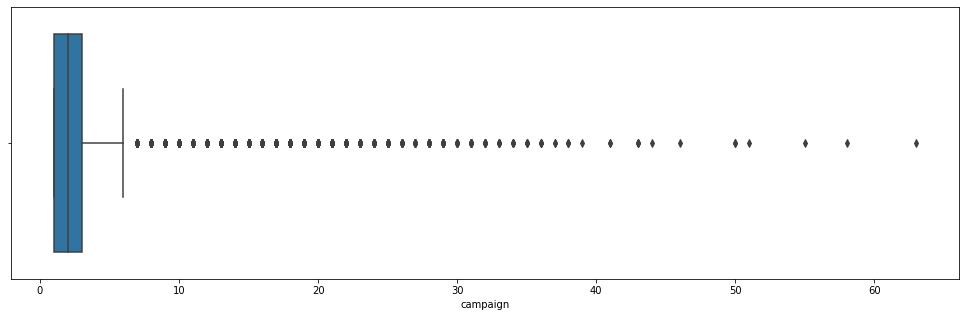

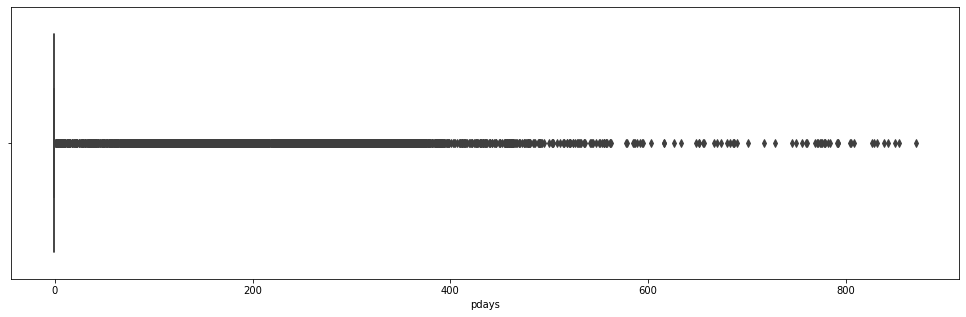

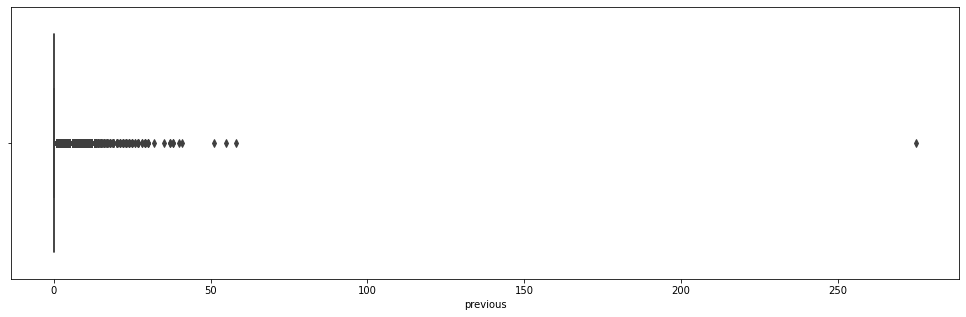

In [52]:
#Visiualizing the Outliers using Boxplot
df1=Bank_Data.select_dtypes(include=['number'])
df1 = df1.drop(['Age','day'],axis=1)

for column in df1:
        plt.figure(figsize=(17,5))
        sns.boxplot(data=df1, x=column)

## **Using One-Hot Encoding strategy to use categorical features in Model**

In [53]:

from sklearn.preprocessing import OneHotEncoder

# here we are doing (sparse=False) so that it won't return us sparse matrix, drop_first = True (because the scores on the nth dummy variable are perfectly predictable from the answers of the n-1 dummy variables.)
encoder = OneHotEncoder(sparse=False,drop = 'first')

# transforming the column after fitting
Bank_Data_Encoded = pd.DataFrame(encoder.fit_transform(Bank_Data[['Marital','education','month','Job','poutcome']]))

#labeling the encode colummns here from '0' , '1' ....'n' to Original Column name with category ( State = original , encoded coulmns = 'State_Bihar' , State_Telangana... etc)
Bank_Data_Encoded.columns  = encoder.get_feature_names_out(['Marital','education','month','Job','poutcome'])

Bank_Data.drop(['Job','Marital','education','month','poutcome'] ,axis=1, inplace=True)

Bank_Data_Features = pd.concat([Bank_Data, Bank_Data_Encoded ], axis=1)

Bank_Data_Features

,Age,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y,Marital_married,Marital_single,education_secondary,education_tertiary,education_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,unknown,5,261,1,-1,0,no,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,no,29,yes,no,unknown,5,151,1,-1,0,no,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,33,no,2,yes,yes,unknown,5,76,1,-1,0,no,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,no,1506,yes,no,unknown,5,92,1,-1,0,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,no,1,no,no,unknown,5,198,1,-1,0,no,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,cellular,17,977,3,-1,0,yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45207,71,no,1729,no,no,cellular,17,456,2,-1,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,no,5715,no,no,cellular,17,1127,5,184,3,yes,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,no,668,no,no,telephone,17,508,4,-1,0,no,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
#Dropping columns which are not required for Model
Bank_Data_Features = Bank_Data_Features.drop(['contact' , 'pdays'  , 'day' , 'duration'] , axis=1)
Bank_Data_Features





,Age,default,balance,housing,loan,campaign,previous,y,Marital_married,Marital_single,education_secondary,education_tertiary,education_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,no,2143,yes,no,1,0,no,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,no,29,yes,no,1,0,no,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,33,no,2,yes,yes,1,0,no,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,no,1506,yes,no,1,0,no,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,no,1,no,no,1,0,no,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,3,0,yes,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45207,71,no,1729,no,no,2,0,yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,no,5715,no,no,5,3,yes,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,no,668,no,no,4,0,no,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#  Binary Encoding of Binary o/p variables

In [55]:

Bank_Data_Features['loan'] = np.where(Bank_Data_Features['loan'] == "yes", 0, 1)
Bank_Data_Features['y'] = np.where(Bank_Data_Features['y'] == "yes", 0, 1)
Bank_Data_Features['housing'] = np.where(Bank_Data_Features['housing'] == "yes", 0, 1)
Bank_Data_Features['default'] = np.where(Bank_Data_Features['default'] == "yes", 0, 1)

Bank_Data_Features


,Age,default,balance,housing,loan,campaign,previous,y,Marital_married,Marital_single,education_secondary,education_tertiary,education_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,Job_blue-collar,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,1,2143,0,1,1,0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,1,29,0,1,1,0,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,33,1,2,0,0,1,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1,1506,0,1,1,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,1,1,1,1,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,825,1,1,3,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45207,71,1,1729,1,1,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
45208,72,1,5715,1,1,5,3,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
45209,57,1,668,1,1,4,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
Bank_Data_Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  45211 non-null  int64  
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  int64  
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   campaign             45211 non-null  int64  
 6   previous             45211 non-null  int64  
 7   y                    45211 non-null  int64  
 8   Marital_married      45211 non-null  float64
 9   Marital_single       45211 non-null  float64
 10  education_secondary  45211 non-null  float64
 11  education_tertiary   45211 non-null  float64
 12  education_unknown    45211 non-null  float64
 13  month_aug            45211 non-null  float64
 14  month_dec            45211 non-null  float64
 15  month_feb            45211 non-null 

## **Model Building**

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [57]:
# Dividing our data into input and output variables
X=pd.concat([Bank_Data_Features.iloc[:,0:7],Bank_Data_Features.iloc[:,8:]],axis=1)
Y=Bank_Data_Features.iloc[:,7]

In [58]:
# Making an instance of the model and training it
LogReg=LogisticRegression()
LogReg.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

## **Model Predictions**

In [59]:
# Accuracy of the Model

Y_pred=LogReg.predict(X)
Y_pred

array([1, 1, 1, ..., 0, 1, 1])

# **Testing Model Accuracy**

In [60]:
# Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


Confusion_matrix = confusion_matrix(Y,Y_pred)
Confusion_matrix

array([[  666,  4623],
       [  322, 39600]])

In [61]:
# The model accuracy is calculated by (a+d)/(a+b+c+d)
Model_Accuracy = (39600+666)/(39600+666+4623+322)
print('Model_Accuracy :', Model_Accuracy)

# calculate prediction
Precision = precision_score(Y, Y_pred, labels=[1,2], average='micro')
print('Precision :',Precision)

# calculate recall
Recall = recall_score(Y, Y_pred, average='binary')
print('Recall:', Recall)

# calculate score
score = f1_score(Y, Y_pred, average='binary')
print('F Score:',score)

Model_Accuracy : 0.8906239631947978
Precision : 0.8954616376093888
Recall: 0.9919342718300687
F Score: 0.9412323964584942


# **ROC curve**

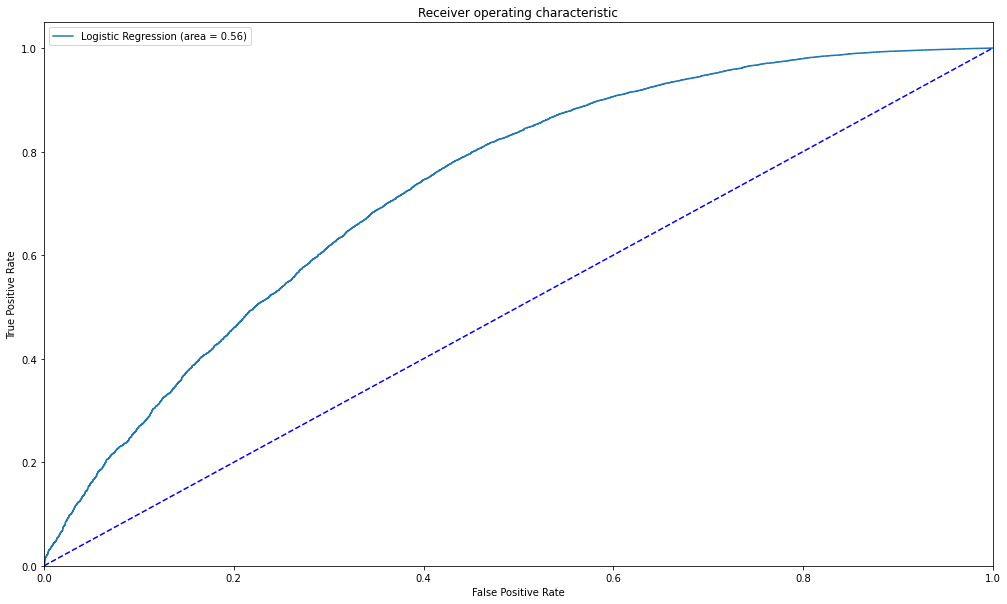

AUC SCORE : 0.5589279980817956


In [79]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y, Y_pred)
fpr, tpr, thresholds = roc_curve(Y, LogReg.predict_proba(X)[:,1])
plt.figure(figsize=(17,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot( [0, 1 ],[0, 1],'b--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="upper left")
plt.savefig('Log_ROC')
plt.show()


print('AUC SCORE :', logit_roc_auc)